## Advanced Regression: Housing Pricing Assignment ##

#### Bussiness Understanding ####

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company is looking at prospective properties to buy to enter the market.

The company wants to know:

-   Which variables are significant in predicting the price of a house, and

-   How well those variables describe the price of a house.


#### Business Goal ####

Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Reading and Understanding the Data ##

Let us first import NumPy and Pandas and read the csv

In [131]:
#import relavant libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [132]:
data =  pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [133]:
#checking shape of data set
data.shape

(1460, 81)

In [134]:
#checking for columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [135]:
#let us check for null values 
pd.set_option('display.max_rows', False)
round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False)
#weill have to see PoolQC, Misc Features where the null values are really high

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
                 ...  
FullBath          0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
GrLivArea         0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
1stFlrSF          0.00
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64

In [136]:
#let us check if columns contain unique vales 
data.nunique()
#id needs to be dropped.

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
                 ... 
3SsnPorch          20
ScreenPorch        76
PoolArea            8
PoolQC              3
Fence               4
MiscFeature         4
MiscVal            21
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

## Data Cleaning ##

In [137]:
#checking for null columns which are of type object
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [138]:
#per the dictionary these are categorical variables, we can assume that if the value is not present it is means that the feature is not available.
col = data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0].index
data[col] = data[col].fillna('none')

In [139]:
#checking if null values are gone.
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [140]:
#we can also drop id as it doesn't help in analsys as the value changes with every row.
data.drop('Id',axis=1, inplace=True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [142]:
##checking for null columns which are of type int and float
data.select_dtypes(include=['int64','float64']).isnull().sum()[data.select_dtypes(include=['int64','float64']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [143]:
#let us see what values are there
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [144]:
#we can replace by median as there isn't a lot of variation between 25% and 75% percentile
data['LotFrontage'] = data['LotFrontage'].replace(np.nan, data['LotFrontage'].median())

In [145]:
#let us see what values are there
data.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [146]:
#let us replace it by median as well, since it seems to describe a good range of values from 25% - 50%
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan, data['MasVnrArea'].median())


In [147]:
#let us look at GarageYrBlt
data[data['GarageYrBlt'].isnull()]['GarageType']
# we see that if the where is GarageYrBlt is null the garage type is none. hence we replace null with 0 to indicate the garage is not there.

39      none
48      none
78      none
88      none
89      none
99      none
108     none
125     none
127     none
140     none
148     none
155     none
        ... 
1234    none
1257    none
1283    none
1323    none
1325    none
1326    none
1337    none
1349    none
1407    none
1449    none
1450    none
1453    none
Name: GarageType, Length: 81, dtype: object

In [148]:
#filling empty places with 0
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [149]:
#converting GarageYrBlt as int
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)

In [150]:
#checking for null values
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
                ..
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

#### Let us see if we can create some derieved metrics specially as well date columns ####

In [151]:
# let us start with the dates
# we have YearBuilt which can tell the age of the property as of today and YrSold which can tell us how old was the house when it was sold.
def timeSinceLastConstruction (data_set) :
    if (data_set['YearBuilt'] == data_set['YearRemodAdd']) :
        return data_set['YrSold'] - data_set['YearBuilt']
    else:
        return data_set['YrSold'] - data_set['YearRemodAdd']

data['House_Age'] = data.apply(timeSinceLastConstruction, axis=1)



In [152]:
#let us check the new column and verify
data[['YearBuilt','YrSold','YearRemodAdd','House_Age']]

,YearBuilt,YrSold,YearRemodAdd,House_Age
0,2003,2008,2003,5
1,1976,2007,1976,31
2,2001,2008,2002,6
3,1915,2006,1970,36
4,2000,2008,2000,8
5,1993,2009,1995,14
6,2004,2007,2005,2
7,1973,2009,1973,36
8,1931,2008,1950,58
...,...,...,...,...


In [153]:
#we can also add a column to check if the house has been remodeled 
# 0 means it hasn't been remodeled. 1 means it has been remodeled.

def isHouseRemodeled(data_set):
    if (data_set.YearBuilt == data_set.YearRemodAdd):
        return 0
    else:
        return 1

data['isRemodeled'] = data.apply(isHouseRemodeled,axis=1)

In [154]:
#checking the data to verify
data[['YearBuilt','YearRemodAdd','isRemodeled','YrSold','House_Age']]

,YearBuilt,YearRemodAdd,isRemodeled,YrSold,House_Age
0,2003,2003,0,2008,5
1,1976,1976,0,2007,31
2,2001,2002,1,2008,6
3,1915,1970,1,2006,36
4,2000,2000,0,2008,8
5,1993,1995,1,2009,14
6,2004,2005,1,2007,2
7,1973,1973,0,2009,36
8,1931,1950,1,2008,58
...,...,...,...,...,...


In [155]:
#let us creat another depending on the age of the house to classify if it was old when it was sold
# we will consider any house older than 20 years as old. 0 for old and 1 for new

def isHouseOld(data_set):
    if data_set.House_Age > 20 :
        return 1
    else:
        return 0

data['isOld'] = data.apply(isHouseOld,axis=1)

In [156]:
data[['YearBuilt','YearRemodAdd','isRemodeled','YrSold','House_Age','isOld']]

,YearBuilt,YearRemodAdd,isRemodeled,YrSold,House_Age,isOld
0,2003,2003,0,2008,5,0
1,1976,1976,0,2007,31,1
2,2001,2002,1,2008,6,0
3,1915,1970,1,2006,36,1
4,2000,2000,0,2008,8,0
5,1993,1995,1,2009,14,0
6,2004,2005,1,2007,2,0
7,1973,1973,0,2009,36,1
8,1931,1950,1,2008,58,1
...,...,...,...,...,...,...


In [157]:
# let us do something similar to the garage built year.
# we will create a column to capture of age of garage when the house was sold.
# 0 if the garage doesn't exist

def ageOfGarage(data_set):
    if data_set.GarageYrBlt == 0:
        return 0
    else:
        return (data_set.YrSold - data_set.GarageYrBlt + 1)

data['Age_of_garage'] = data.apply(ageOfGarage,axis=1)



In [158]:
#checking the newly created column and validatin.
data[['YrSold','GarageYrBlt','Age_of_garage']]

,YrSold,GarageYrBlt,Age_of_garage
0,2008,2003,6
1,2007,1976,32
2,2008,2001,8
3,2006,1998,9
4,2008,2000,9
5,2009,1993,17
6,2007,2004,4
7,2009,1973,37
8,2008,1931,78
...,...,...,...


In [159]:
#now we can add another column to specifcy if garage is old or new
#0 if it 20 year old or doesn't exist 1 if is new

def isGarageNew(data_set):
    if data_set.Age_of_garage == 0:
        return 0
    elif data_set.Age_of_garage > 20:
        return 0
    else:
        return 1

data['isGarageNew'] = data.apply(isGarageNew,axis=1)

In [160]:
#checking the newly created column and validatin.
data[['YrSold','GarageYrBlt','Age_of_garage','isGarageNew']]

,YrSold,GarageYrBlt,Age_of_garage,isGarageNew
0,2008,2003,6,1
1,2007,1976,32,0
2,2008,2001,8,1
3,2006,1998,9,1
4,2008,2000,9,1
5,2009,1993,17,1
6,2007,2004,4,1
7,2009,1973,37,0
8,2008,1931,78,0
...,...,...,...,...


In [161]:
# we can now drop the previuos year columns, we can also drop MoSold as is irrelavant
data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold' ,'GarageYrBlt'], axis = 1, inplace = True)

In [162]:
#let us check if there are any duplicates
data[data.duplicated(keep=False)]
#no duplicates

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,House_Age,isRemodeled,isOld,Age_of_garage,isGarageNew


## Data Visualization ##
let us know visualize the data to see if there any patterns or corrlations 

In [163]:
#importing libraries 
import seaborn as sns
import matplotlib.pyplot as plt


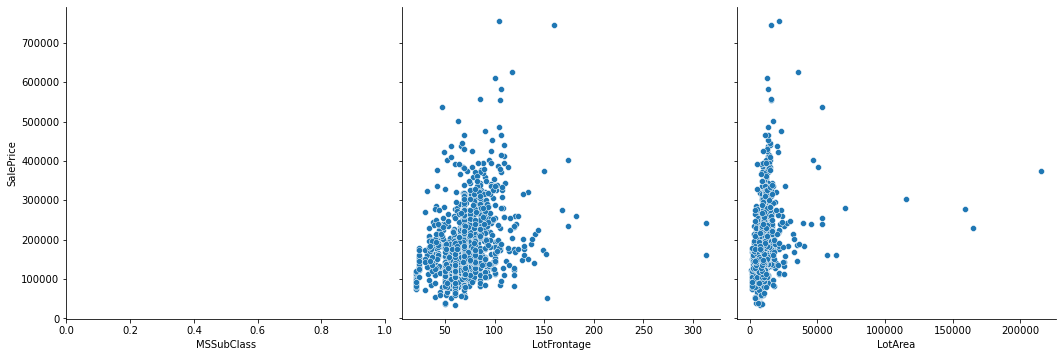

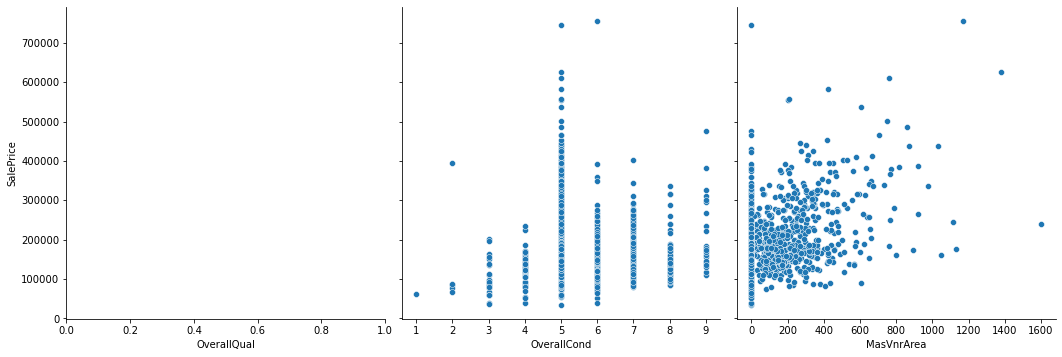

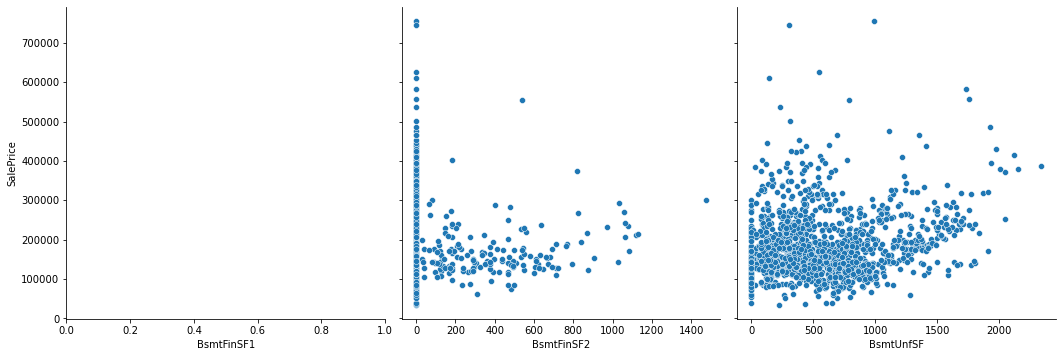

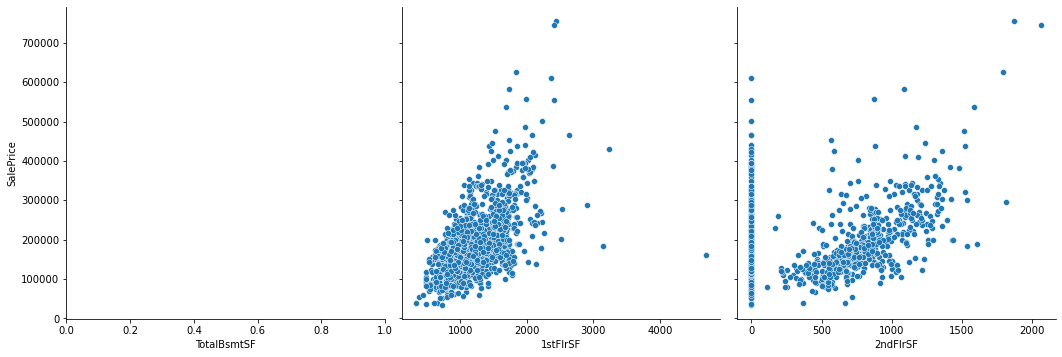

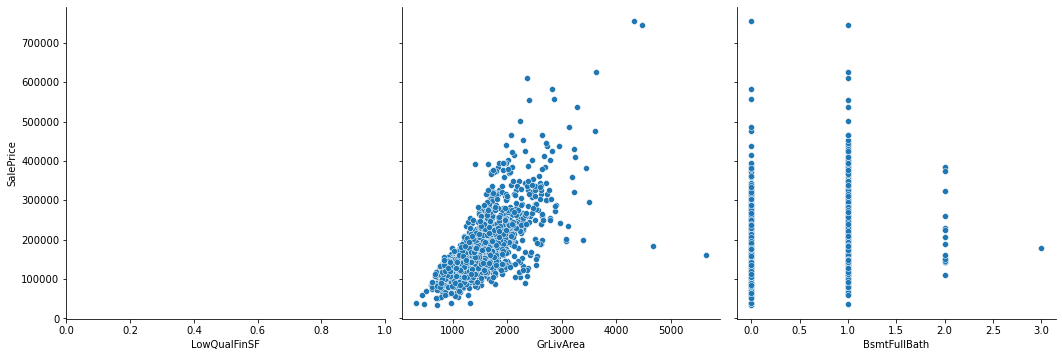

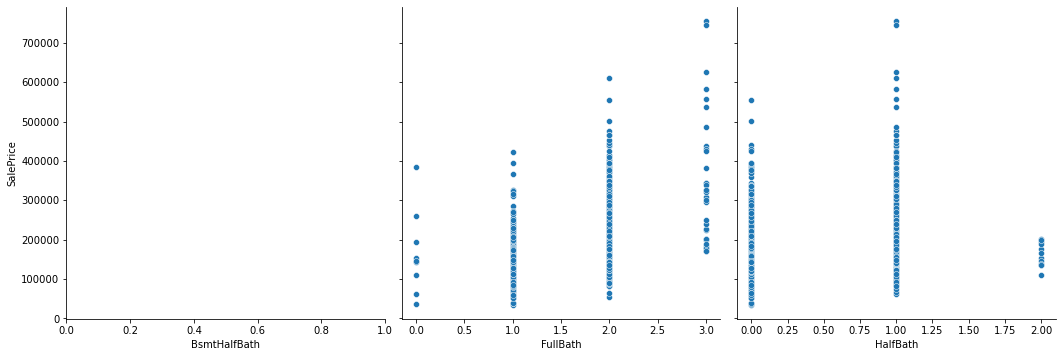

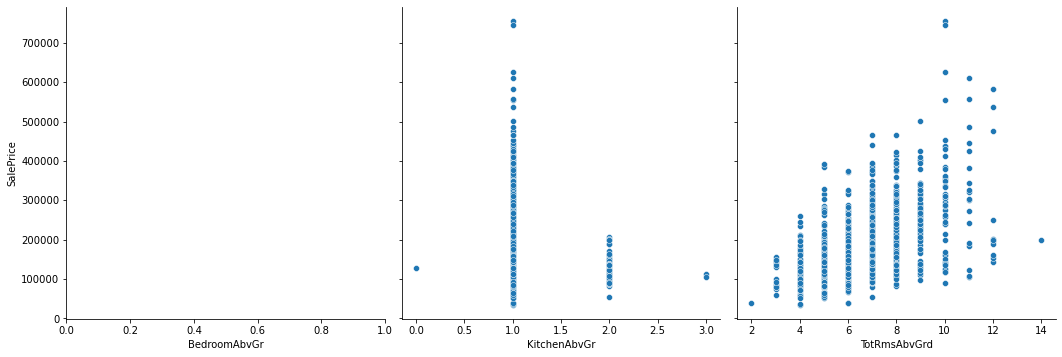

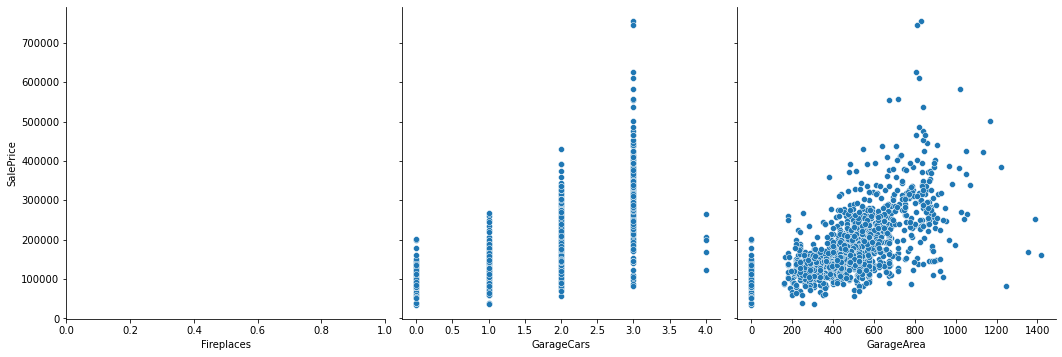

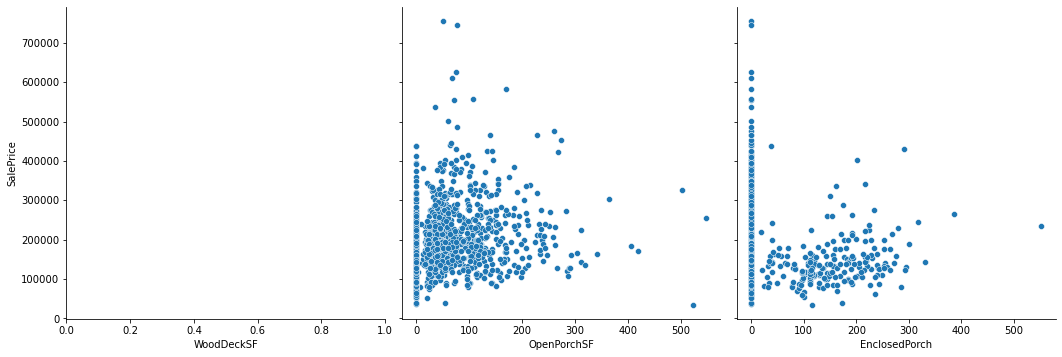

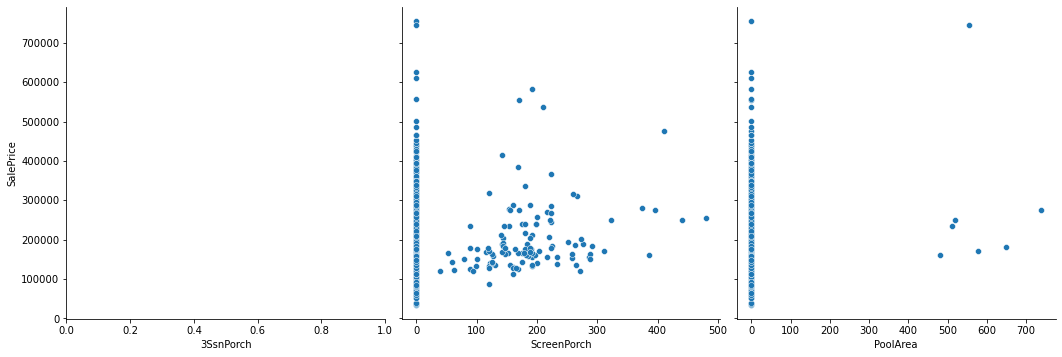

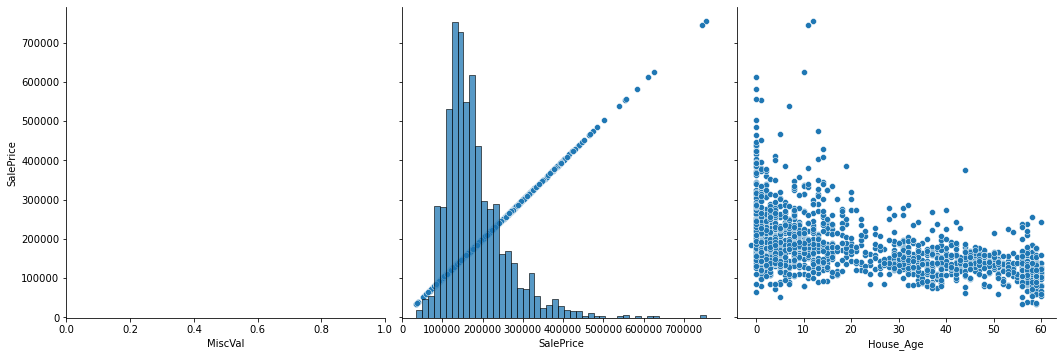

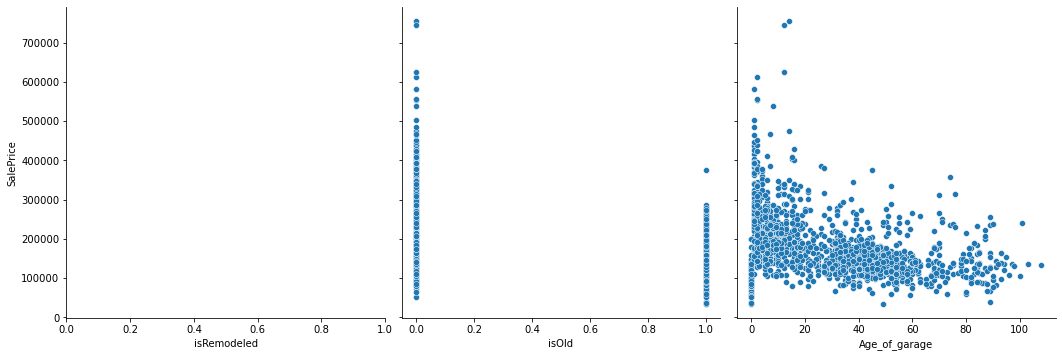

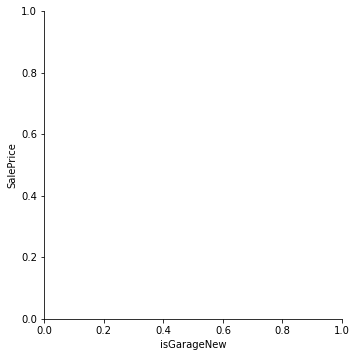

In [164]:
#plot numeric features
col = list(data.select_dtypes(include=['int64','float64']).columns)
for i in range(0,len(col),3):
    if(len(col)-i)>=3:
        sns.pairplot(data, x_vars=[col[i],col[i+1],col[i+2]], y_vars='SalePrice',height=5)
    elif (len(col)-i)==2:
        sns.pairplot(data, x_vars=[col[i],col[i+1]], y_vars='SalePrice',height=5)
    elif (len(col)-i)==1:
        sns.pairplot(data, x_vars=[col[i]], y_vars='SalePrice',height=5)
plt.show()


#### Observations ####
We can see some correlation between Sales price and 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea and TotalBsmtSF
we can also see a slight negative correlation between Sales price and House_Age

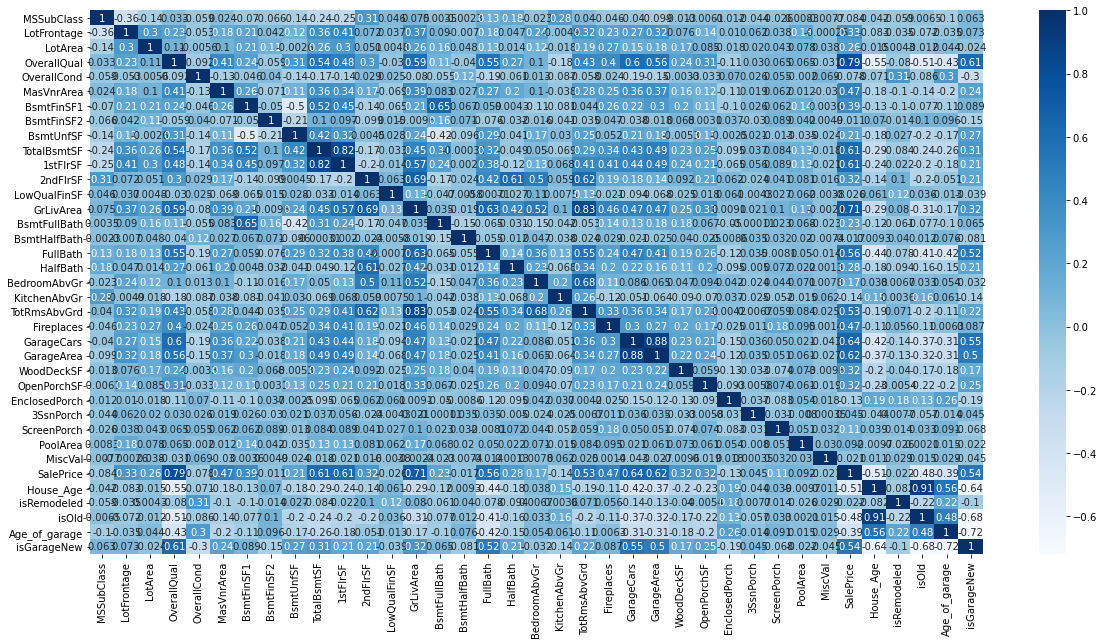

In [165]:
#let us plot heatmap to check the correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap='Blues', annot=True)
plt.show()

#### Observation ####
let us document columns with high correlation. we can look to drop one of them
 - isOld and House_Age
 - TotRmsAbvGrd and GrLivArea
 - GarageArea and GarageCars
 - TotalBsmtSF and 1stFlrSF

In [166]:
#let us drop the redundant columns
data.drop(['isOld','TotRmsAbvGrd','GarageArea'],axis=1,inplace= True)

## Data Preperation ##

In [167]:
# let us also look at columns we have 1 value dominating, this is because it can really skew our results.
for i in data.columns:
    print(i)
    print(data[i].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
LotFrontage
69.0     0.184932
60.0     0.097945
70.0     0.047945
80.0     0.047260
50.0     0.039041
75.0     0.036301
65.0     0.030137
85.0     0.027397
78.0     0.017123
90.0     0.015753
21.0     0.015753
68.0     0.013014
           ...   
128.0    0.000685
160.0    0.000685
168.0    0.000685
112.0    0.000685
144.0    0.000685
39.0     0.000685
106.0    0.000685
33.0     0.000685
38.0     0.000685
138.0    0.000685
140.0    0.000685
137.0    0.000685
Name: LotFrontage, Length: 110, dtype: float64
LotArea
7200     0.017123
9600     0.016438
6000     0.011644
10800

In [168]:
#dropping columns where >=85% of the value is dominated  by 1 value
data = data.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','RoofMatl','ExterCond','BsmtFinType2','BsmtFinSF2','Heating','CentralAir','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','Functional','GarageQual', 'GarageCond', 'PavedDrive','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscFeature','SaleType','MiscVal','Electrical','BsmtCond','Condition1'],axis=1)

In [169]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,House_Age,isRemodeled,Age_of_garage,isGarageNew
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,2,0,61,none,Normal,208500,5,0,6,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,2,298,0,none,Normal,181500,31,0,32,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2,0,42,none,Normal,223500,6,1,8,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,3,0,35,none,Abnorml,140000,36,1,9,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,3,192,84,none,Normal,250000,8,0,9,1


In [ ]:
#let us check again as the output window was limited
for i in data.columns:
    print(i)
    print(data[i].value_counts(normalize=True))

In [171]:
#let us check the values for categorical data and see how to convert them to either binary or numeric if they are ordered.
for i in data.columns:
    if data[i].dtype == np.object :
        print(i)
        print(data[i].value_counts(normalize=True))


MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
             ...   
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
SWISU      0.017123
StoneBr    0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, Length: 25, dtype: float64
BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex 

In [173]:
#looks like these variables are ordered, we can convert them into numberic
#LotShape,BldgType,HouseStyle,ExterQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,Fence


data['LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['BldgType'] = data['BldgType'].map({'Twnhs': 4, 'TwnhsE': 3, 'Duplex': 2, '2fmCon': 1, '1Fam': 0})
data['HouseStyle'] = data['HouseStyle'].map({'SLvl': 7, 'SFoyer': 6, '2.5Fin': 5, '2.5Unf': 4, '2Story': 3,'1.5Fin': 2, '1.5Unf': 1, '1Story': 0})
data['ExterQual'] = data['ExterQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'none': 0})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'none': 0})
data['HeatingQC'] = data['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
data['KitchenQual'] = data['KitchenQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
data['GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'none': 0 })
data['Fence'] = data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'none': 0 })
data['BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})


In [174]:
data['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [175]:
#Rest of the columns need to be coverted into dummy variables
col = data.select_dtypes(include='object').columns

#converting MSZoning into dummies
MSZoning_df = pd.get_dummies(data['MSZoning'], prefix='MSZoning', drop_first = True)
data = pd.concat([data, MSZoning_df], axis = 1)


In [177]:
#converting LotConfig and Neighborhood into dummies

LotConfig_df = pd.get_dummies(data['LotConfig'], prefix='LotConfig', drop_first = True)
data = pd.concat([data, LotConfig_df], axis = 1)

Neighborhood_df = pd.get_dummies(data['Neighborhood'], prefix='Neighborhood', drop_first = True)
data = pd.concat([data, Neighborhood_df], axis = 1)



In [178]:
#converting the rest as well.
RoofStyle_df = pd.get_dummies(data['RoofStyle'], prefix='RoofStyle', drop_first = True)
data = pd.concat([data, RoofStyle_df], axis = 1)

Exterior1st_df = pd.get_dummies(data['Exterior1st'], prefix='Exterior1st', drop_first = True)
data = pd.concat([data, Exterior1st_df], axis = 1)

Exterior2nd_df = pd.get_dummies(data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
data = pd.concat([data, Exterior2nd_df], axis = 1)

MasVnrType_df = pd.get_dummies(data['MasVnrType'], prefix='MasVnrType', drop_first = True)
data = pd.concat([data, MasVnrType_df], axis = 1)

Foundation_df = pd.get_dummies(data['Foundation'], prefix='Foundation', drop_first = True)
data = pd.concat([data, Foundation_df], axis = 1)

GarageType_df = pd.get_dummies(data['GarageType'], prefix='GarageType', drop_first = True)
data = pd.concat([data, GarageType_df], axis = 1)

SaleCondition_df = pd.get_dummies(data['SaleCondition'], prefix='SaleCondition', drop_first = True)
data = pd.concat([data, SaleCondition_df], axis = 1)



In [180]:
#dropping th previuos columns as we have created dummies for them
data = data.drop(['SaleCondition','GarageType','Foundation','MasVnrType','Exterior2nd','Exterior1st','RoofStyle','Neighborhood','LotConfig'],axis=1)

In [181]:
data = data.drop('MSZoning',axis=1)

In [182]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       ...
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_none', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=123)

## Train Test Split ##
We will now split data into train and test

In [183]:
#import libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, MinMaxScaler

In [187]:
#creating train and test data
data_train,data_test = train_test_split(data,train_size=0.70,random_state=100)
print(data_train.shape)
print(data_test.shape)

(1021, 123)
(439, 123)


In [188]:
#scaling the features using MinMaxScaler

scaler = MinMaxScaler()

#we will be scaling all the numberincal variables
num_var = ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'Fence', 'SalePrice', 'House_Age',
       'Age_of_garage']

#fit and transforming train data while only transforming test data
data_train[num_var] = scaler.fit_transform(data_train[num_var])
data_test[num_var] = scaler.transform(data_test[num_var])


In [189]:
# split into X and y 

y_train = data_train.pop('SalePrice')
y_test = data_test.pop('SalePrice')
X_train = data_train
X_test = data_test


## Model building and evaluation ##

#### Using RFE to Select 20 features ####

In [190]:
#import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [191]:
#creating linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE to get 20 features
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)



In [192]:
#let us look at the columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'GarageCars', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior2nd_Stone', 'Foundation_Slab'],
      dtype='object')

In [193]:
#let us update X train and Y with these 50 columns
X_train_rfe = X_train[col]
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [194]:
X_train.shape

(1021, 20)

In [195]:
X_test.shape

(439, 20)

#### Lets start with Ridge regularization ####

In [196]:
#importing libraries 
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [197]:
# list of alphas to tune - 
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 60,70,80,90,100, 120 ,140, 160,180,200, 300, 500, 1000 ]}

#creating a ridge function
ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 37 candidates, totalling 185 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 60, 70, 80,
                                   90, 100, 120, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [198]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 1.0}


In [199]:
#Fitting Ridge model for alpha = 1 and printing coefficients which have been penalised
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.05435438 -0.02755132  0.09215079  0.17696152  0.06610362  0.04786314
  0.01656831  0.16226021  0.07616819  0.1547654   0.0422968   0.06685701
  0.05995595  0.07914132  0.05839985  0.03892334 -0.02641007 -0.01234601
  0.02987869  0.0422099 ]


In [200]:
#importing libraries
from sklearn.metrics import r2_score, mean_squared_error

In [201]:
# Lets us evalute the model some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 Sqaure for train data = ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 Sqaure for test data = ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train data = ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test data = ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for test data = ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test data = ",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 Sqaure for train data =  0.8285405466379235
r2 Sqaure for test data =  0.8382701977583187
RSS for train data =  2.1101962540806447
RSS for test data =  0.8813214679935594
MSE for test data =  0.0020667935887175755
MSE for test data =  0.002007565986317903


#### the difference in r2 values betweeen train and test data is very less, this shows that the model is accurate ####

Text(0, 0.5, 'Sales Price')

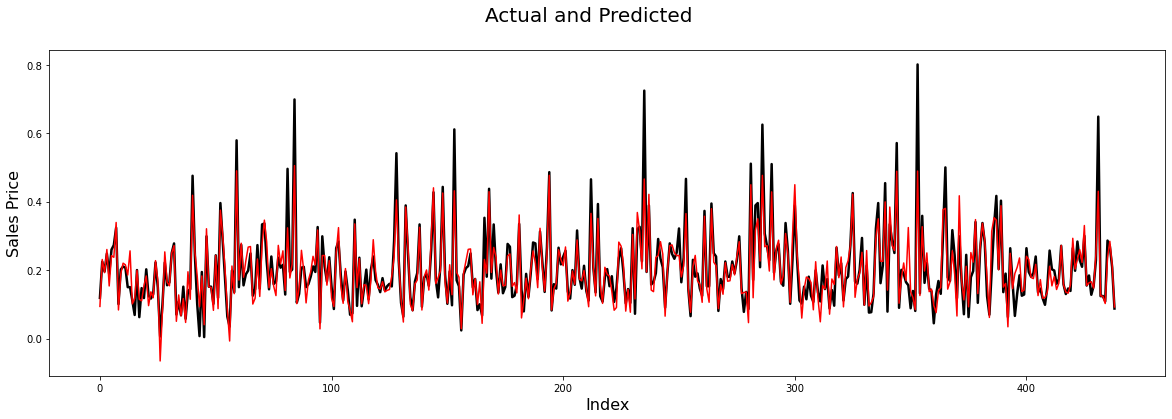

In [202]:
# let us see how actual vs predicted look
# Ridge Regression with all features: Actual vs Predicted
X_seq = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure(figsize=(20,6))
plt.plot(X_seq, y_test, color="black", linewidth=2.5, linestyle="-")
plt.plot(X_seq, y_pred_test, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

#### The graphs overlap, which is a good sign showing accuracy of the model ####

In [203]:
#listing down the features and their coeficients 
ridge_coeff_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4),'Absolute_Value_Coef':abs(ridge.coef_.round(4))})
ridge_coeff_df.reset_index(drop=True, inplace=True)
final_ridge_df = ridge_coeff_df.sort_values(by=['Absolute_Value_Coef'], ascending=False)
pd.set_option('display.max_rows', 500)
final_ridge_df

,Features,Coefficient,Absolute_Value_Coef
3,OverallQual,0.1770,0.1770
7,1stFlrSF,0.1623,0.1623
9,GrLivArea,0.1548,0.1548
2,LotArea,0.0922,0.0922
13,Neighborhood_NoRidge,0.0791,0.0791
8,2ndFlrSF,0.0762,0.0762
11,KitchenQual,0.0669,0.0669
4,BsmtQual,0.0661,0.0661
12,GarageCars,0.0600,0.0600
14,Neighborhood_NridgHt,0.0584,0.0584


In [204]:
pd.set_option('display.max_rows', False)

#### Let us now do Lasso Regularization ####

In [205]:
#creating a Lasso instance.
lasso = Lasso()

folds = 5

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 37 candidates, totalling 185 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 60, 70, 80,
                                   90, 100, 120, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [206]:
#best lambda for lasso
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [207]:
#let us know use this value 
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.05037941, -0.00824998,  0.08071516,  0.18849451,  0.06038201,
        0.04659443, -0.        ,  0.06962002,  0.02069671,  0.28420786,
        0.04094717,  0.065084  ,  0.05847667,  0.0767908 ,  0.0562844 ,
        0.03244339, -0.        , -0.        ,  0.        ,  0.03422753])

In [208]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 Sqaure for train data = ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 Sqaure for test data = ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train data = ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test data = ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for test data = ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test data = ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2 Sqaure for train data =  0.8273637217063059
r2 Sqaure for test data =  0.8368664680686492
RSS for train data =  2.1246797457383733
RSS for test data =  0.8889708751752791
MSE for test data =  0.0020809791828975254
MSE for test data =  0.002024990604043916


#### the difference in r2 values betweeen train and test data is very less, this shows that the model is accurate ####

Text(0, 0.5, 'Sales Price')

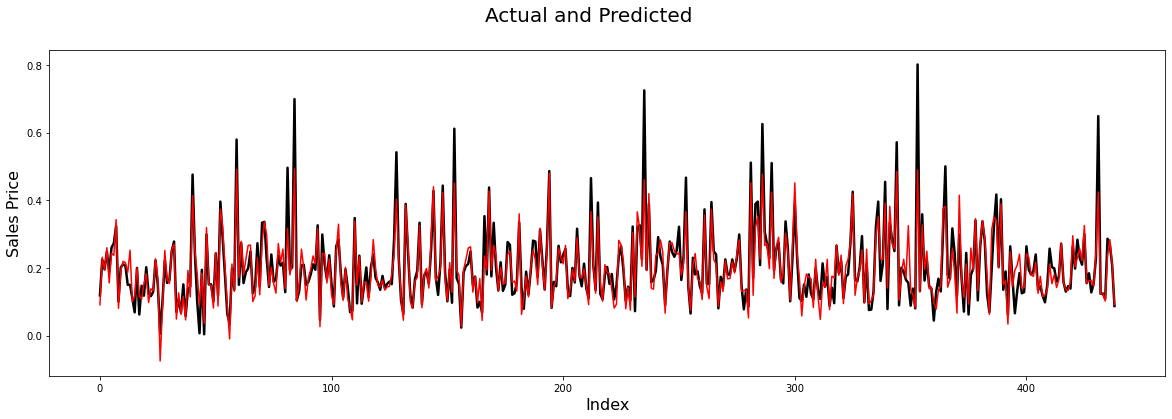

In [209]:
# Let us plot the and see how actual and predicted look
# Lasso Regression with all features: Actual vs Predicted
X_seq = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure(figsize=(20,6))
plt.plot(X_seq, y_test, color="black", linewidth=2.5, linestyle="-")
plt.plot(X_seq, y_pred_test, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

#### The graphs overlap, which is a good sign showing accuracy of the model ####

In [210]:
#listing down the features for lasso and their coefficients 
lasso_coeff_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4),'Absolute_Value_Coef':abs(lasso.coef_.round(4))})
lasso_coeff_df.reset_index(drop=True, inplace=True)
final_lasso_df = lasso_coeff_df.sort_values(by=['Absolute_Value_Coef'], ascending=False)
pd.set_option('display.max_rows', 500)
final_lasso_df

,Features,Coefficient,Absolute_Value_Coef
9,GrLivArea,0.2842,0.2842
3,OverallQual,0.1885,0.1885
2,LotArea,0.0807,0.0807
13,Neighborhood_NoRidge,0.0768,0.0768
7,1stFlrSF,0.0696,0.0696
11,KitchenQual,0.0651,0.0651
4,BsmtQual,0.0604,0.0604
12,GarageCars,0.0585,0.0585
14,Neighborhood_NridgHt,0.0563,0.0563
0,MSSubClass,-0.0504,0.0504


In [211]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

lg_metric = pd.Series(metric2, name = 'Lasso Regression')


final_metric = pd.concat([lr_metric, lg_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.828541,0.827364
1,R2 Score (Test),0.838270,0.836866
2,RSS (Train),2.110196,2.124680
3,RSS (Test),0.881321,0.888971
4,MSE (Train),0.045462,0.045618
5,MSE (Test),0.044806,0.045000


## Observation ##
- We can see in the metrics, the accuray for Ridge and Lasso are almost same.
- In Lasso coefficients for 4 features are 0.
- Lambda value for Ridge is 1 and for Lasso it it 0.0001
- With Lasso we can eliminate 4 features, it has a better edge over 
- Based on Lasso here are the important features
    - GrLivArea - Above grade (ground) living area square feet
    - OverallQual - the overall material and finish of the house
    - LotArea - Lot size in square feet
    - 1stFlrSF - First Floor square feet
    - KitchenQual - Kitchen quality

## Assignment Part II - Subjective Questions ##

#### Question 1: Double the Lamdda values for Ridge and Lasso ####

**Let us start with Ridge**

In [212]:
#After Doubling, New Alpha value = 2
alpha = 2
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
print(ridge2.coef_)


# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 Sqaure for train data = ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 Sqaure for test data = ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train data = ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test data = ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for test data = ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test data = ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

[-0.0523598  -0.01316827  0.07219798  0.16974709  0.06309951  0.04863852
  0.03600735  0.14254576  0.07719246  0.14423564  0.04131766  0.0701763
  0.06344885  0.07867075  0.05809248  0.03745402 -0.01717714 -0.00422364
  0.02203145  0.04089671]
r2 Sqaure for train data =  0.8267433430840581
r2 Sqaure for test data =  0.8352172054352229
RSS for train data =  2.1323149073996825
RSS for test data =  0.8979582760442056
MSE for test data =  0.00208845730401536
MSE for test data =  0.0020454630433808783


In [213]:
new_ridge_df = pd.DataFrame({'Features':X_train.columns,'Ridge wih alpha = 1':ridge.coef_.round(4),'Ridge wih alpha = 2':ridge2.coef_.round(4)})
new_ridge_df

,Features,Ridge wih alpha = 1,Ridge wih alpha = 2
0,MSSubClass,-0.0544,-0.0524
1,LotFrontage,-0.0276,-0.0132
2,LotArea,0.0922,0.0722
3,OverallQual,0.1770,0.1697
4,BsmtQual,0.0661,0.0631
5,BsmtExposure,0.0479,0.0486
6,TotalBsmtSF,0.0166,0.0360
7,1stFlrSF,0.1623,0.1425
8,2ndFlrSF,0.0762,0.0772
9,GrLivArea,0.1548,0.1442


We see that the coefficients value have decreased with the increase in Apha for Ridge

In [214]:
sorted_ridge_df = pd.DataFrame({'Features':X_train.columns,'Ridge wih alpha = 2':ridge2.coef_.round(4),'Absolute_Value':abs(ridge2.coef_.round(4))})
new_sorted_ridge_df = sorted_ridge_df.sort_values(by=['Absolute_Value'],ascending=False)
new_sorted_ridge_df

,Features,Ridge wih alpha = 2,Absolute_Value
3,OverallQual,0.1697,0.1697
9,GrLivArea,0.1442,0.1442
7,1stFlrSF,0.1425,0.1425
13,Neighborhood_NoRidge,0.0787,0.0787
8,2ndFlrSF,0.0772,0.0772
2,LotArea,0.0722,0.0722
11,KitchenQual,0.0702,0.0702
12,GarageCars,0.0634,0.0634
4,BsmtQual,0.0631,0.0631
14,Neighborhood_NridgHt,0.0581,0.0581


In [215]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression (Lambda = 1)': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression (Lambda = 1)'] )

lg_metric = pd.Series(metric3, name = 'Ridge Regression (Lambda = 2)')


final_metric = pd.concat([lr_metric, lg_metric], axis = 1)

final_metric

,Metric,Ridge Regression (Lambda = 1),Ridge Regression (Lambda = 2)
0,R2 Score (Train),0.828541,0.826743
1,R2 Score (Test),0.838270,0.835217
2,RSS (Train),2.110196,2.132315
3,RSS (Test),0.881321,0.897958
4,MSE (Train),0.045462,0.045700
5,MSE (Test),0.044806,0.045227


We see that r2 score has decreased for train and test data

**Let us now evaluate with Lasso**

In [216]:
#Let us take double lamda value
alpha = 0.0002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 
print(lasso2.coef_)

[-0.04821109 -0.          0.03667164  0.19158861  0.05281831  0.04768761
  0.          0.02545452  0.          0.32962721  0.04031087  0.0659171
  0.06083795  0.07477048  0.05433593  0.02361729 -0.         -0.
  0.          0.0234768 ]


In [217]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 Sqaure for train data = ",r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 Sqaure for test data = ",r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train data = ",rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test data = ",rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for test data = ",mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test data = ",mse_test_lr)
metric4.append(mse_test_lr**0.5)

r2 Sqaure for train data =  0.8250938495770724
r2 Sqaure for test data =  0.8304563049019007
RSS for train data =  2.1526156546102833
RSS for test data =  0.9239020649367976
MSE for test data =  0.002108340504025743
MSE for test data =  0.0021045605123845047


In [218]:
new_lasso_df = pd.DataFrame({'Features':X_train.columns,'Lasso wih alpha = .0001':lasso.coef_.round(4),'Lasso wih alpha = .0002':lasso2.coef_.round(4)})
new_lasso_df

,Features,Lasso wih alpha = .0001,Lasso wih alpha = .0002
0,MSSubClass,-0.0504,-0.0482
1,LotFrontage,-0.0082,-0.0000
2,LotArea,0.0807,0.0367
3,OverallQual,0.1885,0.1916
4,BsmtQual,0.0604,0.0528
5,BsmtExposure,0.0466,0.0477
6,TotalBsmtSF,-0.0000,0.0000
7,1stFlrSF,0.0696,0.0255
8,2ndFlrSF,0.0207,0.0000
9,GrLivArea,0.2842,0.3296


We see that the coefficients value have decreased with the increase in Apha for Lasso

In [219]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Lasso Regression (Lambda = .0001)': metric2
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Lasso Regression (Lambda = .0001)'] )

lg_metric = pd.Series(metric4, name = 'Lasso Regression (Lambda = .0002)')


final_metric = pd.concat([lr_metric, lg_metric], axis = 1)

final_metric

,Metric,Lasso Regression (Lambda = .0001),Lasso Regression (Lambda = .0002)
0,R2 Score (Train),0.827364,0.825094
1,R2 Score (Test),0.836866,0.830456
2,RSS (Train),2.124680,2.152616
3,RSS (Test),0.888971,0.923902
4,MSE (Train),0.045618,0.045917
5,MSE (Test),0.045000,0.045875


We see that r2 score has decreased for train and test data

In [220]:
#consolidating information in a dataframe
sorted_lasso_df = pd.DataFrame({'Features':X_train.columns,'Lasso wih alpha = .0002':lasso2.coef_.round(4),'Absolute_Value':abs(lasso2.coef_.round(4))})
new_sorted_lasso_df = sorted_ridge_df.sort_values(by=['Absolute_Value'],ascending=False)
new_sorted_lasso_df

,Features,Ridge wih alpha = 2,Absolute_Value
3,OverallQual,0.1697,0.1697
9,GrLivArea,0.1442,0.1442
7,1stFlrSF,0.1425,0.1425
13,Neighborhood_NoRidge,0.0787,0.0787
8,2ndFlrSF,0.0772,0.0772
2,LotArea,0.0722,0.0722
11,KitchenQual,0.0702,0.0702
12,GarageCars,0.0634,0.0634
4,BsmtQual,0.0631,0.0631
14,Neighborhood_NridgHt,0.0581,0.0581


## Question 3 ##
Dropping top 5 features from Lasso
 - GrLivArea
 - OverallQual
 - LotArea
 - Neighborhood_NoRidge
 - 1stFlrSF


In [221]:
#Dropping 5 features 
X_train_new = X_train.drop(['GrLivArea', 'OverallQual', 'LotArea', 'Neighborhood_NoRidge', '1stFlrSF'], axis=1)
X_test_new = X_test.drop(['GrLivArea', 'OverallQual', 'LotArea', 'Neighborhood_NoRidge', '1stFlrSF'], axis=1)

In [222]:
#Rebuilding lasso model
lasso = Lasso()

params_new = {'alpha': [0.00001,0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params_new, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [223]:
#getting best value
print(model_cv.best_estimator_)

Lasso(alpha=1e-05)


In [224]:
alpha =.00001

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train_new, y_train) 

Lasso(alpha=1e-05)

In [225]:
lasso_new.coef_

array([-0.05929049, -0.00550755,  0.0710688 ,  0.05650402,  0.47420479,
        0.18814396,  0.03688671,  0.11315052,  0.10446129,  0.05983181,
        0.05632564,  0.02823925,  0.04312648,  0.03047166,  0.10503981])

In [227]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso_new.predict(X_train_new)
y_pred_test = lasso_new.predict(X_test_new)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 Sqaure for train data = ",r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 Sqaure for test data = ",r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for train data = ",rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test data = ",rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE for test data = ",mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE for test data = ",mse_test_lr)
metric5.append(mse_test_lr**0.5)

r2 Sqaure for train data =  0.7576188826668966
r2 Sqaure for test data =  0.8053489028406333
RSS for train data =  2.983047687525895
RSS for test data =  1.0607209575307182
MSE for test data =  0.0029216921523270273
MSE for test data =  0.002416220859978857


**we are seeing the accuracy of the model has reduced**

In [228]:
sorted_lasso_new_df = pd.DataFrame({'Features':X_train_new.columns,'Coefficients':lasso_new.coef_.round(4),'Absolute_Value':abs(lasso_new.coef_.round(4))})
new_sorted_lasso_new_df = sorted_lasso_new_df.sort_values(by=['Absolute_Value'],ascending=False)
new_sorted_lasso_new_df

,Features,Coefficients,Absolute_Value
4,TotalBsmtSF,0.4742,0.4742
5,2ndFlrSF,0.1881,0.1881
7,KitchenQual,0.1132,0.1132
14,Foundation_Slab,0.1050,0.1050
8,GarageCars,0.1045,0.1045
2,BsmtQual,0.0711,0.0711
9,Neighborhood_NridgHt,0.0598,0.0598
0,MSSubClass,-0.0593,0.0593
3,BsmtExposure,0.0565,0.0565
10,Neighborhood_StoneBr,0.0563,0.0563


The five most important features now are – 
1.	TotalBsmtSF
2.	2ndFlrSF
3.	KitchenQual
4.	Foundation_Slab
5.	GarageCars
